In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import json
import time
import datetime
from time import mktime
from datetime import datetime


%matplotlib inline


In [30]:
def to_date(str_date, float_flag=False):
    if float_flag: 
        return datetime.strptime(str_date, "%Y-%m-%d %H:%M:%S.%f").timetuple()
    else: 
        return datetime.strptime(str_date, "%Y-%m-%d %H:%M:%S").timetuple()


def visualize(data):
    df = pd.read_csv('data/realTweets/Twitter_volume_'+data+'.csv', delimiter = ',')

    json_f = open('data/anomalies.json')
    json_str = json_f.read()
    labels_dict = json.loads(json_str)
    labels = labels_dict['realTweets/Twitter_volume_'+data+'.csv']
    labels = [(to_date(l, True), to_date(u, True)) for l, u in labels]

    df['timestamp'] = df['timestamp'].apply(to_date)
    df['label'] = 0
    df['label'] = df['timestamp'].apply(lambda t: np.sum([l <= t <= u for l, u in labels]) > 0)
    df['timestamp'] = df['timestamp'].apply(lambda t: matplotlib.dates.date2num(datetime.fromtimestamp(mktime(t))))

    plt.figure(figsize=(8,4))
    plt.plot(df[df['label']]['timestamp'], df[df['label']]['value'], c='r')
    plt.plot(df[df['label'] == False]['timestamp'], df[df['label'] == False]['value'], c='b')
    plt.title(data)
    plt.xlabel('Timestamp')
    plt.ylabel('Mentions Per 5 Minutes')
    plt.show()
    
    return df

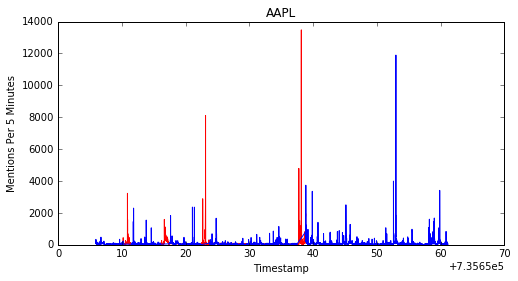

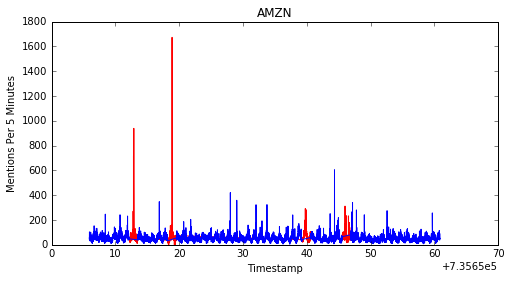

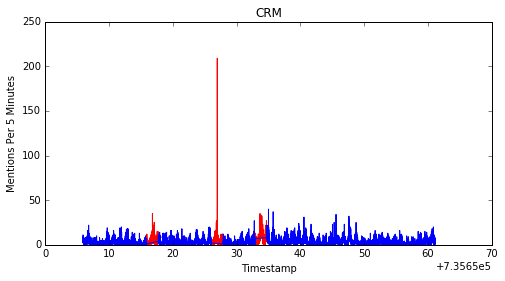

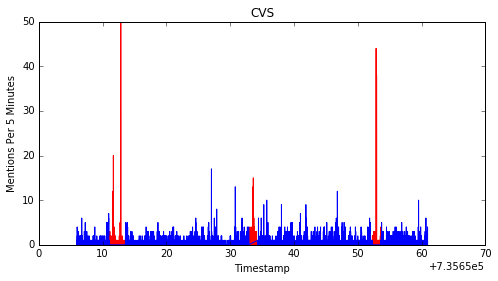

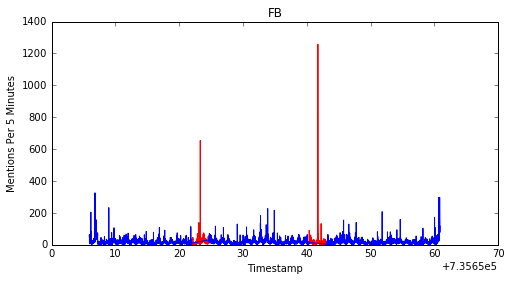

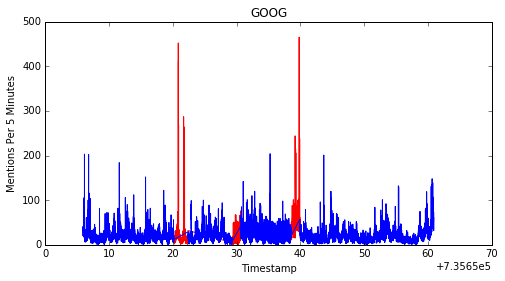

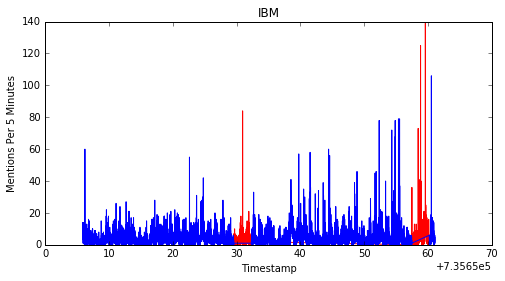

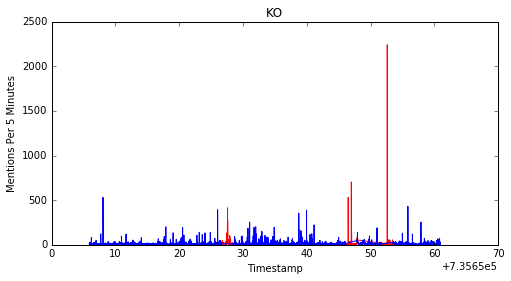

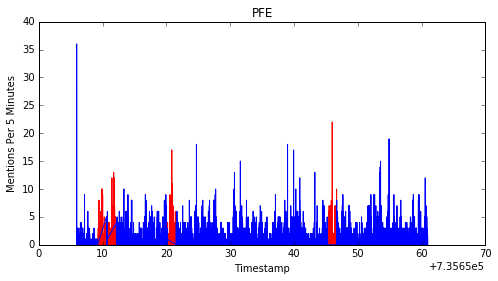

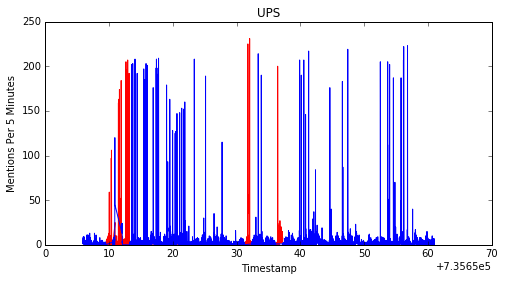

In [31]:
datasets = ['AAPL', 'AMZN', 'CRM', 'CVS', 'FB', 'GOOG', 'IBM', 'KO', 'PFE', 'UPS']
cleaned_dfs = [visualize(data) for data in datasets]